In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [18]:
class simple_neural_network(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.tensor(torch.rand(1)),requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(torch.rand(1)),requires_grad=False)

        self.w01 = nn.Parameter(torch.tensor(torch.rand(1)),requires_grad=False)
        self.b01 = nn.Parameter(torch.tensor(torch.rand(1)),requires_grad=False)

        self.w02 = nn.Parameter(torch.tensor(torch.rand(1)),requires_grad=False)
        self.b02 = nn.Parameter(torch.tensor(torch.rand(1)),requires_grad=False)

        self.w11 = nn.Parameter(torch.tensor(torch.rand(1)),requires_grad=False)
        self.w21 = nn.Parameter(torch.tensor(torch.rand(1)),requires_grad=False)
        self.w31 = nn.Parameter(torch.tensor(torch.rand(1)),requires_grad=False)

        self.w20 = nn.Parameter(torch.tensor(torch.rand(1)),requires_grad=False)

        
    def forward(self,input):
        input_to_layer00 = self.w00 * input + self.b00
        layer_00_output = F.sigmoid(input_to_layer00)
        layer_00_output = layer_00_output * self.w11

        input_to_layer01 = self.w01 * input + self.b01
        layer_01_output = F.sigmoid(input_to_layer01)
        layer_01_output = layer_01_output * self.w21

        input_to_layer02 = self.w02 * input + self.b02
        layer_02_output = F.sigmoid(input_to_layer02)
        layer_02_output = layer_02_output * self.w31

        output = layer_00_output + layer_01_output + layer_02_output 
        output = F.tanh(output)
        output = output * self.w20

        return output


In [19]:
X = torch.linspace(start=1,end=5,steps=100)
X

tensor([1.0000, 1.0404, 1.0808, 1.1212, 1.1616, 1.2020, 1.2424, 1.2828, 1.3232,
        1.3636, 1.4040, 1.4444, 1.4848, 1.5253, 1.5657, 1.6061, 1.6465, 1.6869,
        1.7273, 1.7677, 1.8081, 1.8485, 1.8889, 1.9293, 1.9697, 2.0101, 2.0505,
        2.0909, 2.1313, 2.1717, 2.2121, 2.2525, 2.2929, 2.3333, 2.3737, 2.4141,
        2.4545, 2.4949, 2.5354, 2.5758, 2.6162, 2.6566, 2.6970, 2.7374, 2.7778,
        2.8182, 2.8586, 2.8990, 2.9394, 2.9798, 3.0202, 3.0606, 3.1010, 3.1414,
        3.1818, 3.2222, 3.2626, 3.3030, 3.3434, 3.3838, 3.4242, 3.4646, 3.5051,
        3.5455, 3.5859, 3.6263, 3.6667, 3.7071, 3.7475, 3.7879, 3.8283, 3.8687,
        3.9091, 3.9495, 3.9899, 4.0303, 4.0707, 4.1111, 4.1515, 4.1919, 4.2323,
        4.2727, 4.3131, 4.3535, 4.3939, 4.4343, 4.4747, 4.5152, 4.5556, 4.5960,
        4.6364, 4.6768, 4.7172, 4.7576, 4.7980, 4.8384, 4.8788, 4.9192, 4.9596,
        5.0000])

In [20]:
simple_model = simple_neural_network()
Y = simple_model(X)
Y

tensor([0.4745, 0.4757, 0.4768, 0.4779, 0.4790, 0.4800, 0.4810, 0.4819, 0.4829,
        0.4838, 0.4846, 0.4855, 0.4863, 0.4870, 0.4878, 0.4885, 0.4892, 0.4899,
        0.4906, 0.4912, 0.4918, 0.4924, 0.4930, 0.4935, 0.4941, 0.4946, 0.4951,
        0.4956, 0.4961, 0.4965, 0.4970, 0.4974, 0.4978, 0.4982, 0.4986, 0.4990,
        0.4993, 0.4997, 0.5000, 0.5003, 0.5007, 0.5010, 0.5013, 0.5016, 0.5018,
        0.5021, 0.5024, 0.5026, 0.5029, 0.5031, 0.5033, 0.5036, 0.5038, 0.5040,
        0.5042, 0.5044, 0.5046, 0.5048, 0.5050, 0.5051, 0.5053, 0.5055, 0.5056,
        0.5058, 0.5059, 0.5061, 0.5062, 0.5064, 0.5065, 0.5066, 0.5068, 0.5069,
        0.5070, 0.5071, 0.5072, 0.5073, 0.5074, 0.5076, 0.5077, 0.5078, 0.5078,
        0.5079, 0.5080, 0.5081, 0.5082, 0.5083, 0.5084, 0.5084, 0.5085, 0.5086,
        0.5087, 0.5087, 0.5088, 0.5089, 0.5089, 0.5090, 0.5091, 0.5091, 0.5092,
        0.5092])

Text(0, 0.5, 'Y')

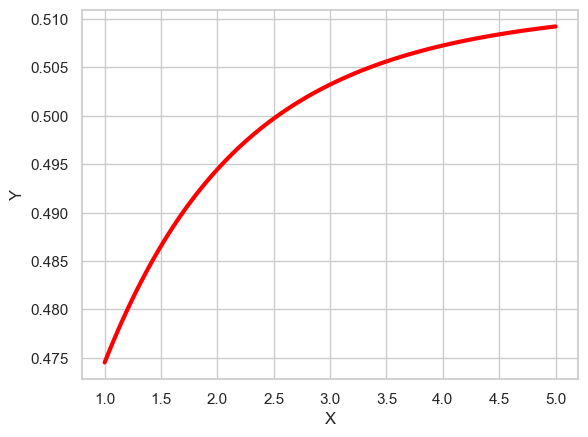

In [21]:
sns.set(style="whitegrid")

sns.lineplot(
    x=X,
    y=Y,
    color='red',
    linewidth=3
)


plt.xlabel('X')
plt.ylabel('Y')

In [22]:
class trainable_neural_network(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.tensor(torch.rand(1)),requires_grad=True)
        self.b00 = nn.Parameter(torch.tensor(torch.rand(1)),requires_grad=True)

        self.w01 = nn.Parameter(torch.tensor(torch.rand(1)),requires_grad=True)
        self.b01 = nn.Parameter(torch.tensor(torch.rand(1)),requires_grad=True)

        self.w02 = nn.Parameter(torch.tensor(torch.rand(1)),requires_grad=True)
        self.b02 = nn.Parameter(torch.tensor(torch.rand(1)),requires_grad=True)

        self.w11 = nn.Parameter(torch.tensor(torch.rand(1)),requires_grad=True)
        self.w21 = nn.Parameter(torch.tensor(torch.rand(1)),requires_grad=True)
        self.w31 = nn.Parameter(torch.tensor(torch.rand(1)),requires_grad=True)

        self.w20 = nn.Parameter(torch.tensor(torch.rand(1)),requires_grad=True)

        
    def forward(self,input):
        input_to_layer00 = self.w00 * input + self.b00
        layer_00_output = F.sigmoid(input_to_layer00)
        layer_00_output = layer_00_output * self.w11

        input_to_layer01 = self.w01 * input + self.b01
        layer_01_output = F.sigmoid(input_to_layer01)
        layer_01_output = layer_01_output * self.w21

        input_to_layer02 = self.w02 * input + self.b02
        layer_02_output = F.sigmoid(input_to_layer02)
        layer_02_output = layer_02_output * self.w31

        output = layer_00_output + layer_01_output + layer_02_output 
        output = F.tanh(output)
        output = output * self.w20

        return output


In [23]:
train_model = trainable_neural_network()
newY = train_model(X)
newY

tensor([0.3991, 0.4003, 0.4014, 0.4026, 0.4037, 0.4048, 0.4058, 0.4068, 0.4078,
        0.4088, 0.4097, 0.4106, 0.4115, 0.4124, 0.4132, 0.4140, 0.4148, 0.4156,
        0.4163, 0.4170, 0.4177, 0.4184, 0.4191, 0.4197, 0.4203, 0.4209, 0.4215,
        0.4221, 0.4226, 0.4232, 0.4237, 0.4242, 0.4247, 0.4252, 0.4256, 0.4261,
        0.4265, 0.4270, 0.4274, 0.4278, 0.4282, 0.4285, 0.4289, 0.4293, 0.4296,
        0.4300, 0.4303, 0.4306, 0.4309, 0.4312, 0.4315, 0.4318, 0.4321, 0.4323,
        0.4326, 0.4328, 0.4331, 0.4333, 0.4336, 0.4338, 0.4340, 0.4342, 0.4344,
        0.4346, 0.4348, 0.4350, 0.4352, 0.4354, 0.4356, 0.4357, 0.4359, 0.4361,
        0.4362, 0.4364, 0.4365, 0.4367, 0.4368, 0.4369, 0.4371, 0.4372, 0.4373,
        0.4375, 0.4376, 0.4377, 0.4378, 0.4379, 0.4380, 0.4381, 0.4382, 0.4383,
        0.4384, 0.4385, 0.4386, 0.4387, 0.4388, 0.4389, 0.4389, 0.4390, 0.4391,
        0.4392], grad_fn=<MulBackward0>)

Text(0.5, 0, 'Y')

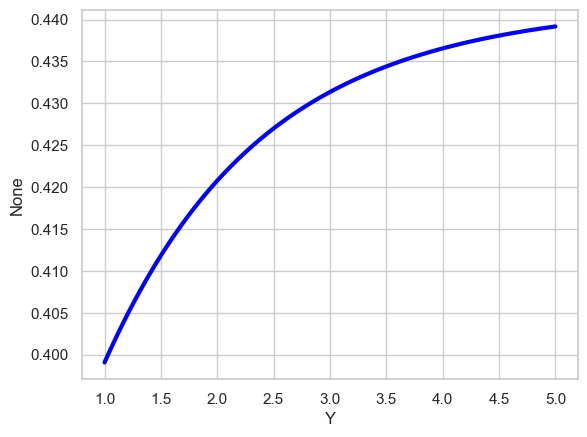

In [24]:
sns.set(style="whitegrid")
sns.lineplot(
    x=X,
    y=newY.detach(),
    color='blue',linewidth=3
)
plt.xlabel('X')
plt.xlabel('Y')


In [25]:
optimizer = SGD(train_model.parameters(),lr=0.01)
loss = nn.MSELoss()

In [26]:
for epoch in range(101):
    total_loss = 0

    for i in range(len(X)):
        input_i = X[i]
        actual_output_i = Y[i]

        pred_output_i = train_model(input_i)

        loss_value = loss(pred_output_i, actual_output_i)

        loss_value.backward()

        total_loss += loss_value

    print('Epoch: ', epoch, ' | Total Loss: ', total_loss)
    optimizer.step()
    optimizer.zero_grad()


Epoch:  0  | Total Loss:  tensor(0.5224, grad_fn=<AddBackward0>)
Epoch:  1  | Total Loss:  tensor(0.2002, grad_fn=<AddBackward0>)
Epoch:  2  | Total Loss:  tensor(0.0846, grad_fn=<AddBackward0>)
Epoch:  3  | Total Loss:  tensor(0.0340, grad_fn=<AddBackward0>)
Epoch:  4  | Total Loss:  tensor(0.0146, grad_fn=<AddBackward0>)
Epoch:  5  | Total Loss:  tensor(0.0065, grad_fn=<AddBackward0>)
Epoch:  6  | Total Loss:  tensor(0.0032, grad_fn=<AddBackward0>)
Epoch:  7  | Total Loss:  tensor(0.0019, grad_fn=<AddBackward0>)
Epoch:  8  | Total Loss:  tensor(0.0014, grad_fn=<AddBackward0>)
Epoch:  9  | Total Loss:  tensor(0.0012, grad_fn=<AddBackward0>)
Epoch:  10  | Total Loss:  tensor(0.0011, grad_fn=<AddBackward0>)
Epoch:  11  | Total Loss:  tensor(0.0010, grad_fn=<AddBackward0>)
Epoch:  12  | Total Loss:  tensor(0.0010, grad_fn=<AddBackward0>)
Epoch:  13  | Total Loss:  tensor(0.0010, grad_fn=<AddBackward0>)
Epoch:  14  | Total Loss:  tensor(0.0010, grad_fn=<AddBackward0>)
Epoch:  15  | Total 

In [27]:
pred_y = train_model(X)
pred_y

tensor([0.4681, 0.4695, 0.4708, 0.4721, 0.4733, 0.4745, 0.4757, 0.4768, 0.4779,
        0.4790, 0.4801, 0.4811, 0.4820, 0.4830, 0.4839, 0.4848, 0.4857, 0.4866,
        0.4874, 0.4882, 0.4889, 0.4897, 0.4904, 0.4911, 0.4918, 0.4925, 0.4931,
        0.4938, 0.4944, 0.4950, 0.4956, 0.4961, 0.4967, 0.4972, 0.4977, 0.4982,
        0.4987, 0.4992, 0.4996, 0.5001, 0.5005, 0.5009, 0.5013, 0.5017, 0.5021,
        0.5025, 0.5028, 0.5032, 0.5035, 0.5038, 0.5042, 0.5045, 0.5048, 0.5051,
        0.5053, 0.5056, 0.5059, 0.5062, 0.5064, 0.5067, 0.5069, 0.5071, 0.5074,
        0.5076, 0.5078, 0.5080, 0.5082, 0.5084, 0.5086, 0.5088, 0.5090, 0.5091,
        0.5093, 0.5095, 0.5096, 0.5098, 0.5100, 0.5101, 0.5103, 0.5104, 0.5105,
        0.5107, 0.5108, 0.5109, 0.5110, 0.5112, 0.5113, 0.5114, 0.5115, 0.5116,
        0.5117, 0.5118, 0.5119, 0.5120, 0.5121, 0.5122, 0.5123, 0.5124, 0.5125,
        0.5125], grad_fn=<MulBackward0>)

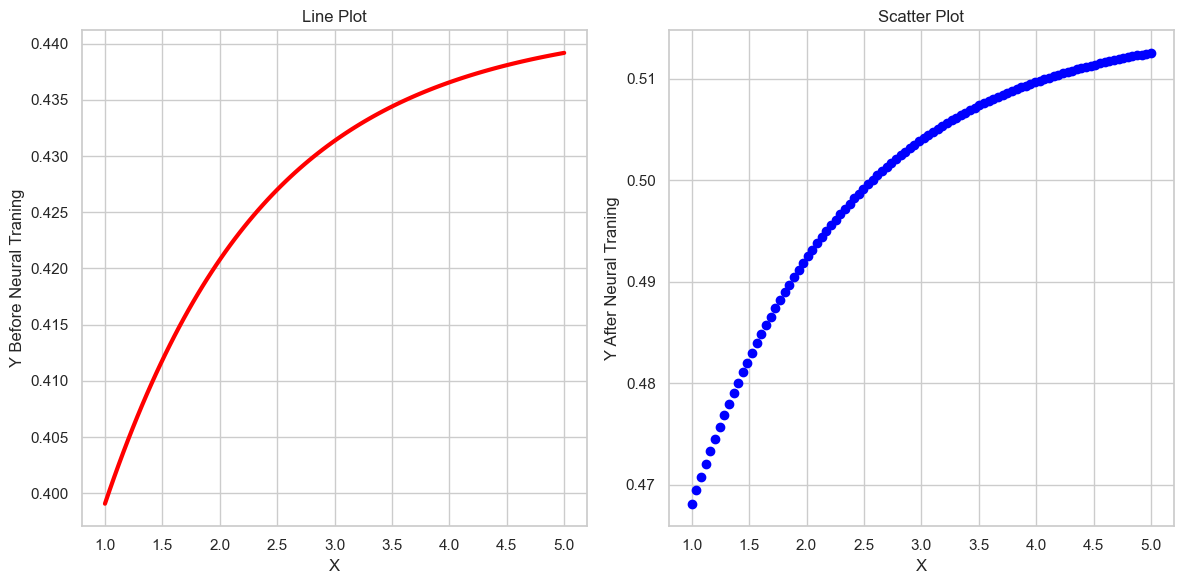

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


sns.lineplot(x=X, y=newY.detach(), color='red', linewidth=3, ax=ax1)
ax1.set_xlabel('X')  
ax1.set_ylabel('Y Before Neural Traning')  
ax1.set_title('Line Plot')  


ax2.scatter(x=X, y=pred_y.detach(), color='blue', marker='o')
ax2.set_xlabel('X')  
ax2.set_ylabel('Y After Neural Traning')  
ax2.set_title('Scatter Plot')  


plt.tight_layout()  
plt.show()
